## Github depository
https://github.com/holsteirik/Snake_games_exam

# Are children motivated to learn about types of animals or individuals?

## This data was collected by me and Karl Ditlefsen in several kindergardens in Northern Norway. The data was previously used to write an exam in psy-2707 by Holst and Diflefsen (2022), but all plots and analysis was redone in python for this course. 

## Study details
Children were given a choice to learn a fact about the animal on a picture or a fact about the type of animal on the picture. After answering, the children were told an interesting fact about either the type of animal or that specific animal. Each child was presented with this choice three times per animal for four different animals, resulting in a total of 12 choices. We also wanted to determine if children were always motivated to learn about types, or if their motivation was influenced by the experimenters' knowledge. Therefore, the experimenters acted either ignorant (uninformed) or knowledgeable (informed) about the animal in question.

The study had two hypotheses: 
    1. Children would choose the Type option more often if the experimenter appeared informed compared to uninformed.
    2. In the informed condition, children would select the Type option significantly more often than expected by chance.

To test these hypotheses, we conducted two t-tests. The first test was to compare the type preference in the informed and uninformed conditions. The second test was to determine whether the likelihood of choosing the Type option was significantly different from chance (50%). Given the 12 choices, this would mean selecting Type at least 6 times. 

Cimpian, A. & Park, J. J. (2014). Tell Me About Pangolins! Evidence That Children Are 
Motivated to Learn About Kinds. J Exp Psychol Gen, 143(1), 46-55. 
https://doi.org/10.1037/a0031687

Holst, E. & Diflefsen, K. (2022). Er barn motivert til å lære om typer eller individer? En replikasjon [Unpublished manuscript]. Institutt for psykologi, Norges Arktiske universitet.

#### Import packages

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

#### Load the data

In [2]:
data = pd.read_csv("../data/data_barnehage.csv", delimiter=";")

#### Convert age column to floats

In [3]:
data['alder'] = data['alder'].str.replace(',', '.').astype(float)

#### Filter out the rows where age is less than 4

In [4]:
filtered_data = data[data['alder'] >= 4]

#### Split the data into two conditions

In [5]:
informert = filtered_data[filtered_data['betingelse'] == 'informert']['sum_dyr']
uinformert = filtered_data[filtered_data['betingelse'] == 'uinformert']['sum_dyr']

#### Calculate means and standard errors of the means

In [6]:
informert_mean = informert.mean()
uinformert_mean = uinformert.mean()
informert_sem = informert.sem()
uinformert_sem = uinformert.sem()

#### Perform an independent t-test with scripty, between the informed and uninformed conditions, assuming unequal variances

In [7]:
t_stat1, p_value1 = ttest_ind(informert, uinformert, equal_var=False)

#### Print the results of the independent t-test

In [8]:
print("Independent t-test results:")
print("t-statistic: ", t_stat1)
print("p-value: ", p_value1)

Independent t-test results:
t-statistic:  2.0544170928213186
p-value:  0.04791134783400178


#### Perform a one-sample t-test against 50% chance to pick Type. This chance is 6 if choices were random

In [9]:
t_stat2, p_value2 = ttest_1samp(informert, popmean=6)

#### Print the results of one sample t-test against chance

In [10]:
print("t-value: ", t_stat2)
print("p-value2: ", p_value2)

t-value:  1.9530923010507828
p-value2:  0.06256376123349318


#### Calculate degrees of freedom for the first and second t-test respectivly

In [11]:
degrees_of_freedom1 = len(informert) + len(uinformert) - 2
degrees_of_freedom2 = len(informert) - 1

### Setting up the plot

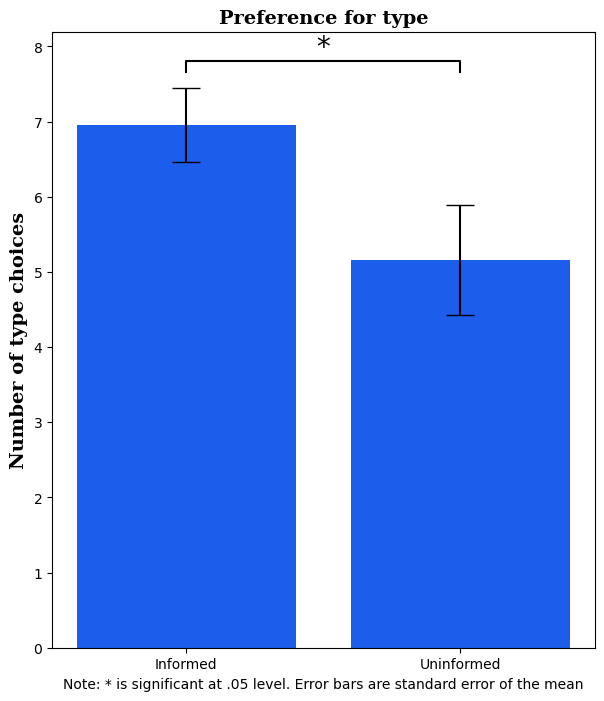

In [14]:
# Create figure and set size
fig, ax = plt.subplots(figsize=(7, 8))

# Plot the bar chart
ax.bar(["Informed", "Uninformed"], [informert_mean, uinformert_mean], 
       yerr=[informert_sem, uinformert_sem], capsize=10, color="#1d5dec")

# Set the labels and title
ax.set_ylabel("Number of type choices", 
              fontdict={"fontsize": 14, "fontweight": "bold", "fontfamily": "serif"})
ax.set_xlabel("Note: * is significant at .05 level. Error bars are standard error of the mean")
plt.title("Preference for type", fontdict={"fontsize": 14, "fontweight": "bold", "fontfamily": "serif"})

# Add significance stars if p-value is less than 0.05
if p_value1 < 0.05:
    x1, x2 = 0, 1
    y, h, col = 1.1 * max(informert_mean, uinformert_mean), 0.15, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*0.5, y+h, "*", ha='center', va='bottom', color=col, fontsize=20)

# Show the plot
plt.show()

#### Printing out results of the experiment depending on the results using .format

In [13]:
# Print header for results
print("Results:")

# If independent t-test is significant
if p_value1 < 0.05:
    
    # If one sample t-test is NOT significant
    if p_value2 > 0.05:
        # Print results when one sample t-test is NOT significant
        print("The manipulation led to a significant difference between conditions "
              "t({0}) = {1:.2f}, p = {2:.3f}). However, the children in the informed condition "
              "did not pick Type significantly more often than chance t({3}) = {4:.2f}, p = {5:.3f}.".format(
                  degrees_of_freedom1, t_stat1, p_value1, degrees_of_freedom2, t_stat2, p_value2))
              
    # if One sample t-test is significant
    if p_value2 < 0.05:
        # Print results when one sample t-test is significant
        print("The manipulation led to a significant difference between conditions "
              "t({0}) = {1:.2f}, p = {2:.3f}), and children in the informed condition picked "
              "Type significantly more often than chance t({3}) = {4:.2f}, p = {5:.3f}.".format(
                  degrees_of_freedom1, t_stat1, p_value1, degrees_of_freedom2, t_stat2, p_value2))
        
# If independent t-test is NOT significant        
else:
    # Print results when independent t-test is NOT significant
    print("The manipulation did not lead to any significant differences between the conditions "
          "t({0}) = {1:.2f}, p = {2:.3f}).".format(degrees_of_freedom1, t_stat1, p_value1))


Results:
The manipulation led to a significant difference between conditions t(42) = 2.05, p = 0.048). However, the children in the informed condition did not pick Type significantly more often than chance t(24) = 1.95, p = 0.063.
